# Wartościowe linki do PCA i k-srednich

https://developpaper.com/r-language-principal-component-analysis-pca-wine-visualization-dispersion-point-diagram-and-load-diagram-of-principal-components/

https://github.com/Deepesh87/PCA/blob/master/wine.R

https://rpubs.com/amolrk7/289957

http://rstudio-pubs-static.s3.amazonaws.com/14702_e498ca35771c4a29899c0c1cdef688c1.html

https://www.r-bloggers.com/2013/11/computing-and-visualizing-pca-in-r/

Ważne:
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/



## kmeans

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/

# Testy

In [14]:
library(ggfortify)
library(factoextra)

In [15]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)
#   save(wine, file="wine.Rdata", compress=TRUE)

In [16]:
wine

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


In [17]:
stdwine=as.data.frame(scale(wine[,2:14]))

In [18]:
pca_res <- prcomp(stdwine, scale = TRUE)

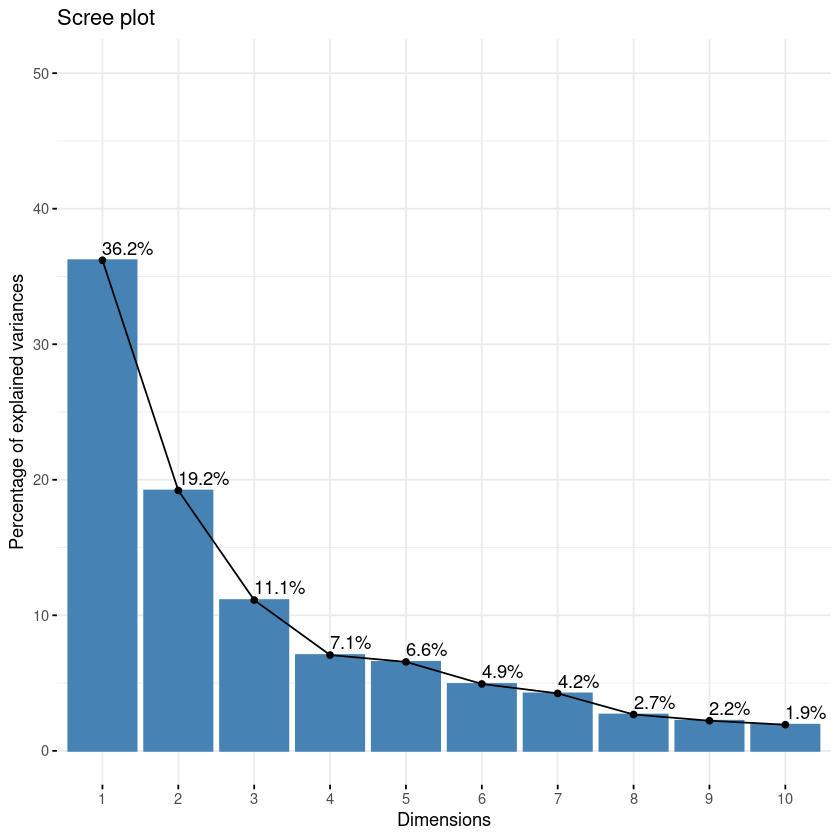

In [19]:
fviz_eig(pca_res, addlabels = TRUE, ylim = c(0, 50))

In [21]:
wine$Type

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

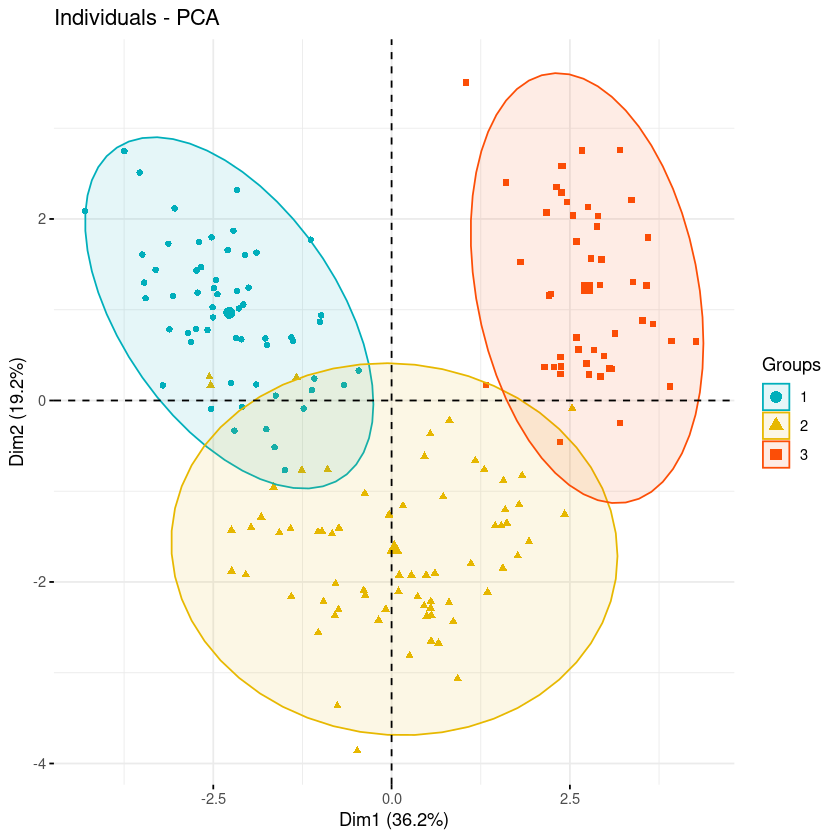

In [22]:
fviz_pca_ind(pca_res,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = wine$Type, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

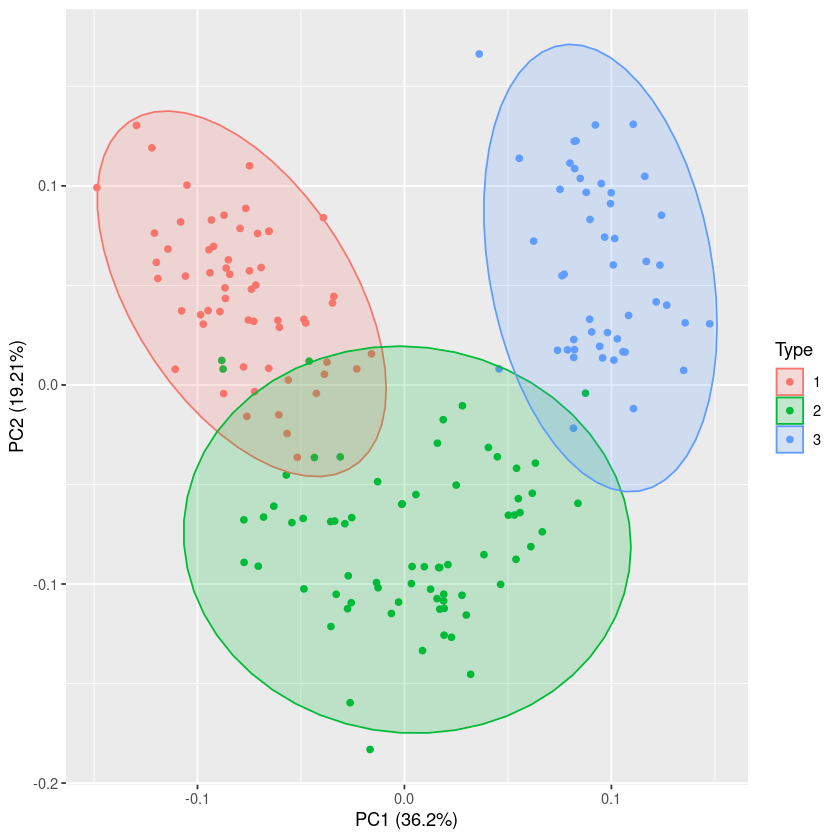

In [7]:
autoplot(pca_res, data = wine, colour = 'Type', frame = TRUE ,frame.type = 'norm')
# to jest to co potrzebne 

# kmeans

In [2]:
library("factoextra")

In [12]:
# Compute k-means with k = 3
set.seed(123)
res.km <- kmeans(scale(wine[,2:14]), 3, nstart = 25)
# K-means clusters showing the group of each individuals
res.km$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

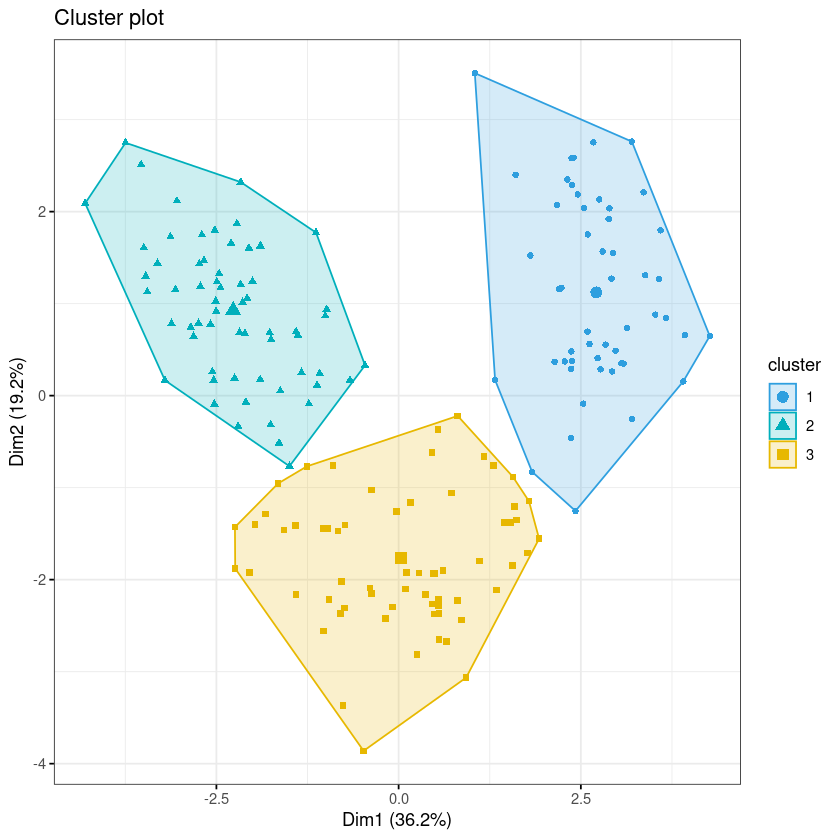

In [13]:
fviz_cluster(res.km, data = wine[,2:14],
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )